# Science Fair 2023
## Making an AI Model That Predicts Earthquakes' Magnitudes
*Nadia Radwan - WWSEF*



![Wikimedia Commons/>](https://th.bing.com/th/id/OIP.8DArMdLNu0s5X6iuShmAhQHaFA?w=267&h=181&c=7&r=0&o=5&pid=1.7) 


***
# Part 1
## Making Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [4]:
df = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [5]:
df

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3


In [6]:
df['timestamp'] = df['Date'] + ' ' + df['Time']

C:\Users\abeer\AppData\Local\Temp\ipykernel_10464\3303721065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['Date'] + ' ' + df['Time']


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'],errors='coerce' )

C:\Users\abeer\AppData\Local\Temp\ipykernel_10464\2538813300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'],errors='coerce' )


In [8]:
df['unix_timestamp'] = df['timestamp'].astype('datetime64[s]').astype('int64')

# print the updated DataFrame
print(df)

             Date      Time  Latitude  Longitude   Depth  Magnitude  \
0      01/02/1965  13:44:18   19.2460   145.6160  131.60        6.0   
1      01/04/1965  11:29:49    1.8630   127.3520   80.00        5.8   
2      01/05/1965  18:05:58  -20.5790  -173.9720   20.00        6.2   
3      01/08/1965  18:49:43  -59.0760   -23.5570   15.00        5.8   
4      01/09/1965  13:32:50   11.9380   126.4270   15.00        5.8   
...           ...       ...       ...        ...     ...        ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941   12.30        5.6   
23408  12/28/2016  09:13:47   38.3777  -118.8957    8.80        5.5   
23409  12/28/2016  12:38:51   36.9179   140.4262   10.00        5.9   
23410  12/29/2016  22:30:19   -9.0283   118.6639   79.00        6.3   
23411  12/30/2016  20:08:28   37.3973   141.4103   11.94        5.5   

                timestamp       unix_timestamp  
0     1965-01-02 13:44:18  -157630542000000000  
1     1965-01-04 11:29:49  -157465811000000000  


C:\Users\abeer\AppData\Local\Temp\ipykernel_10464\2211712746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unix_timestamp'] = df['timestamp'].astype('datetime64[s]').astype('int64')


In [9]:
# df['timestamp'] = pd.to_datetime(df.timestamp, format='%m/%d/%Y %H:%M:%S')

In [10]:
df['float_timestamp'] = (df['timestamp'].astype('datetime64[s]').astype('int64') / 1e9).astype('float64')

# print the updated DataFrame
print(df)

             Date      Time  Latitude  Longitude   Depth  Magnitude  \
0      01/02/1965  13:44:18   19.2460   145.6160  131.60        6.0   
1      01/04/1965  11:29:49    1.8630   127.3520   80.00        5.8   
2      01/05/1965  18:05:58  -20.5790  -173.9720   20.00        6.2   
3      01/08/1965  18:49:43  -59.0760   -23.5570   15.00        5.8   
4      01/09/1965  13:32:50   11.9380   126.4270   15.00        5.8   
...           ...       ...       ...        ...     ...        ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941   12.30        5.6   
23408  12/28/2016  09:13:47   38.3777  -118.8957    8.80        5.5   
23409  12/28/2016  12:38:51   36.9179   140.4262   10.00        5.9   
23410  12/29/2016  22:30:19   -9.0283   118.6639   79.00        6.3   
23411  12/30/2016  20:08:28   37.3973   141.4103   11.94        5.5   

                timestamp       unix_timestamp  float_timestamp  
0     1965-01-02 13:44:18  -157630542000000000    -1.576305e+08  
1     1965-01-0

C:\Users\abeer\AppData\Local\Temp\ipykernel_10464\2322599523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['float_timestamp'] = (df['timestamp'].astype('datetime64[s]').astype('int64') / 1e9).astype('float64')


In [11]:
X = df[['float_timestamp','Latitude', 'Longitude']]
y = df[['Magnitude', 'Depth']]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18729, 3) (4683, 3) (18729, 2) (4683, 2)


In [15]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([[  5.925,  61.573],
       [  5.626,  10.374],
       [  5.672,  65.88 ],
       ...,
       [  5.912, 208.121],
       [  5.977,  33.06 ],
       [  5.727,  33.405]])

In [16]:
acc = reg.score(X_test, y_test)*100
print("Accuracy::",acc)

Accuracy:: 38.68060646702736


In [18]:
df.corr() 
a= df.corr() 


C:\Users\abeer\AppData\Local\Temp\ipykernel_10464\1330498997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\abeer\AppData\Local\Temp\ipykernel_10464\1330498997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a= df.corr()


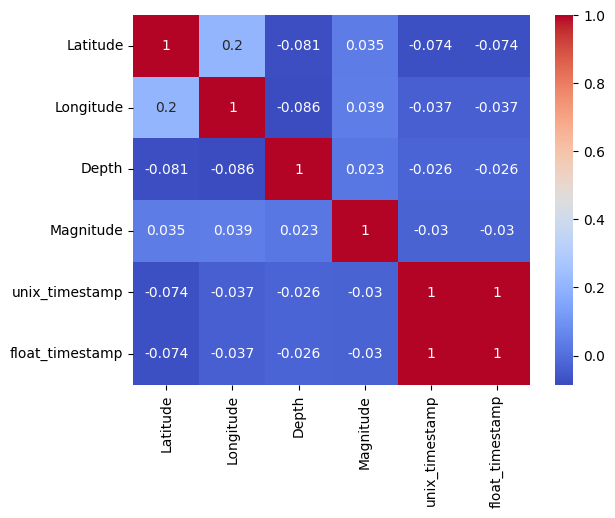

In [20]:
import seaborn as sns
sns.heatmap(a, annot=True, cmap='coolwarm')
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[  5.89 ,  72.69 ],
       [  5.705,  10.31 ],
       [  5.76 ,  77.505],
       ...,
       [  5.845, 208.775],
       [  5.915,  33.55 ],
       [  5.685,  35.205]])

In [ ]:
acc = best_fit.score(X_test, y_test)*100
print("Accuracy::",acc)

In [ ]:
df.columns

***
# Part 2 
## Data Visualization

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.title("Major Earthquakes Around the World, 1965-2016")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='green',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()